In [1]:
!pip install kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("data/hotel_bookings.csv")

In [6]:
df.shape

(119390, 32)

In [7]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
print("Hotel : ", df['hotel'].unique())
print("\nBooking Status : \n", df['is_canceled'].value_counts())
print("\nEarliest arrival date : \n", df['arrival_date_year'].min())
print("\nLatest arrival date : \n", df['arrival_date_year'].max())

Hotel :  ['Resort Hotel' 'City Hotel']

Booking Status : 
 is_canceled
0    75166
1    44224
Name: count, dtype: int64

Earliest arrival date : 
 2015

Latest arrival date : 
 2017


__Handling missing values__

In [16]:
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False)


company     112593
agent        16340
country        488
children         4
dtype: int64

In [19]:
#droping missing company 
df.drop('company', axis=1, inplace=True)

#filling missing chindren with 0 (like;y to have no children)
df['children'].fillna(0, inplace=True)

#filling missing agent with o
df['agent'].fillna(0, inplace=True)
df['agent']=df['agent'].astype(int)

#filling missing country with unknown
df['country'].fillna('Unknown', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_21024\1578590906.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_21024\1578590906.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
import calendar

In [24]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x : list(calendar.month_name).index(x))
#create arrival_date column
df['arrival_date']=pd.to_datetime(dict(
    year = df['arrival_date_year'],
    month = df['arrival_date_month'],
    day = df['arrival_date_day_of_month']
))

In [26]:
print("Earliest arrival date : ", df['arrival_date'].min())
print("\nLatest arrival date : ", df['arrival_date'].max())

Earliest arrival date :  2015-07-01 00:00:00

Latest arrival date :  2017-08-31 00:00:00


In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

___Total nights stayed___

In [33]:
df['total_stay']=df['stays_in_weekend_nights'] + df['stays_in_week_nights']

___Was the guest a repeat customer?___

In [37]:
df['is_repeated_guest'] = df['is_repeated_guest'].apply(lambda x : "yes" if x==1 else "no")

In [42]:
df.head(2)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0


___Exploratory Data Analysis :___

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

___1. What's the overall cancellation rate ?___

In [44]:
cancel_rate = df['is_canceled'].value_counts(normalize=True)*100
print(cancel_rate)

is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_21024\4260510050.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='is_canceled', palette='Set2')


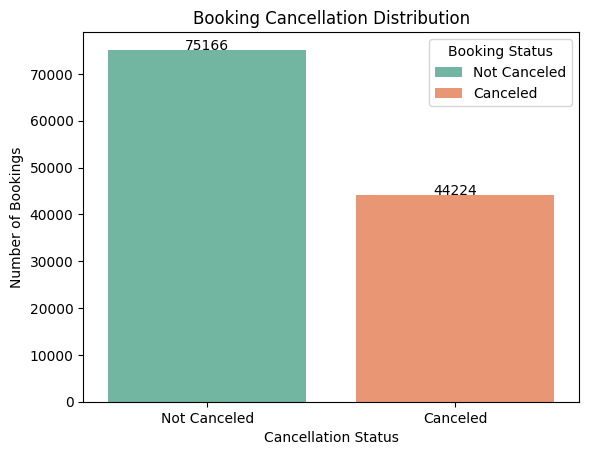

In [48]:
ax = sns.countplot(data=df, x='is_canceled', palette='Set2')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
for p in ax.patches:
    count = int(p.get_height())
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    ax.text(x=x_pos, y=y_pos + 5, s=f'{count}', ha='center')
plt.legend(labels=['Not Canceled', 'Canceled'], title='Booking Status')
plt.title('Booking Cancellation Distribution')
plt.ylabel('Number of Bookings')
plt.xlabel('Cancellation Status')
plt.show()


___Overall cancellation rate : 37%___

___2. When do people book the most?___

C:\Users\USER\AppData\Local\Temp\ipykernel_21024\2317277984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_month', data=df, palette='viridis')


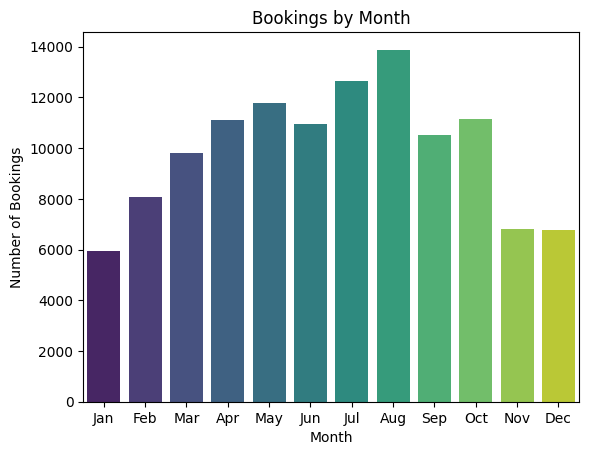

In [52]:
df['arrival_month']=df['arrival_date'].dt.month
sns.countplot(x='arrival_month', data=df, palette='viridis')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(0,12), labels=[calendar.month_abbr[i+1] for i in range(12)])
plt.show()

___People book the most in the month : August___

___3. Which countries bring in most guests?___

C:\Users\USER\AppData\Local\Temp\ipykernel_21024\516079989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='rocket')


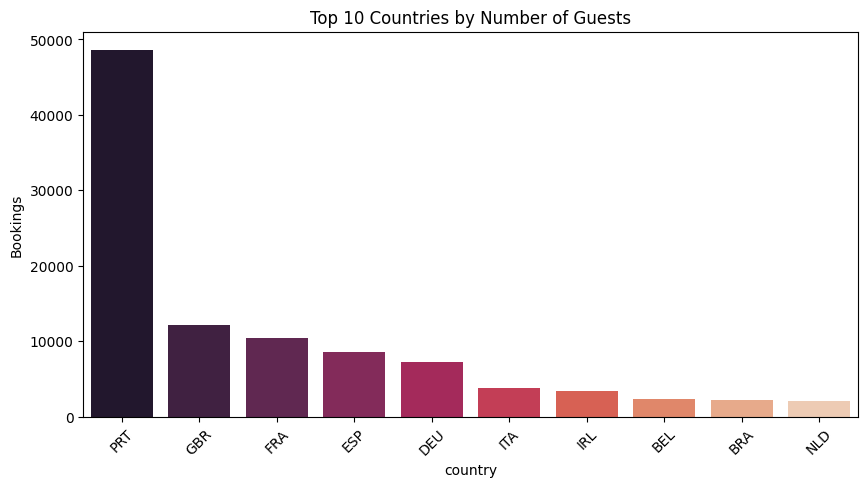

In [53]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='rocket')
plt.title('Top 10 Countries by Number of Guests')
plt.ylabel('Bookings')
plt.xticks(rotation=45)
plt.show()

___Country that bring in most guests : PRT___

___4. City Hotel VS Resort Hotel - which has more cancellation?___

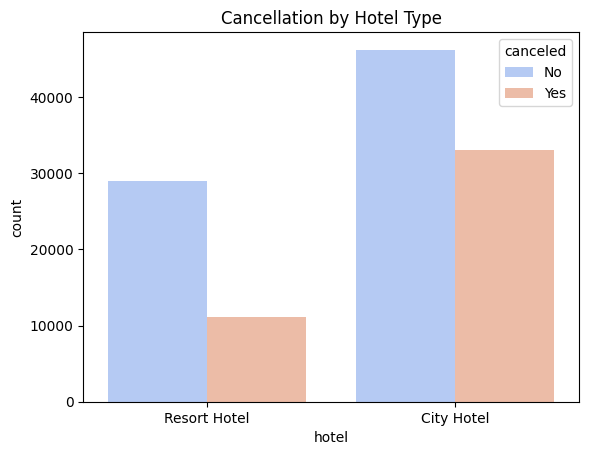

In [54]:
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='coolwarm')
plt.title('Cancellation by Hotel Type')
plt.legend(title='canceled', labels=['No', 'Yes'])
plt.show()

___City Hotels have more bookings along with higher cancellation count.___

___5. Do families or solo travelers cancel more?___

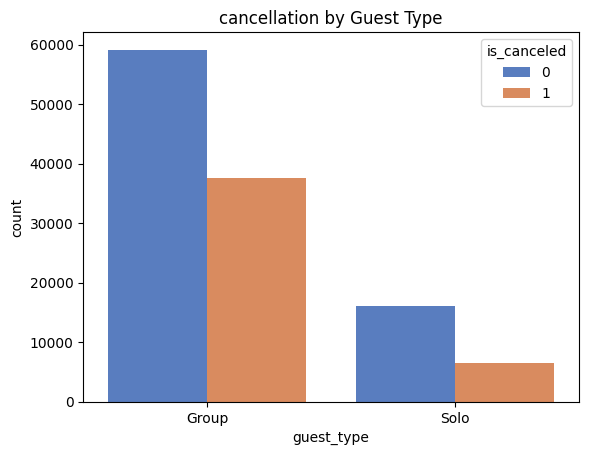

In [55]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['guest_type'] = df['total_guests'].apply(lambda x : 'Solo' if x==1 else 'Group')
sns.countplot(data=df, x='guest_type', hue='is_canceled', palette='muted')
plt.title('cancellation by Guest Type')
plt.show()

___Guests booking in group have higher cancellation rate.___

___6.  Are repeat guests more loyal?___

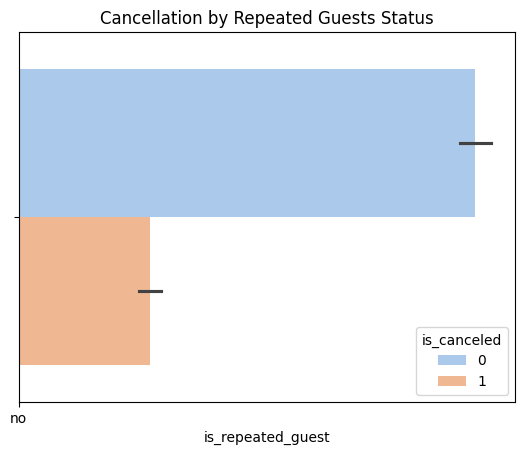

In [59]:
sns.barplot(data=df, x='is_repeated_guest', hue='is_canceled', palette='pastel')
plt.title('Cancellation by Repeated Guests Status')
plt.show()

___Repeated guests have negetive tendency to cancel.___

___7. Does lead time affect cancellations?___

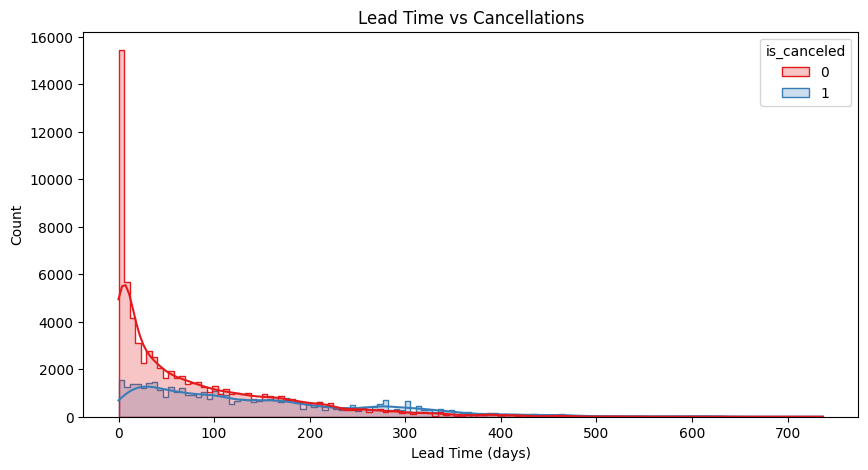

In [60]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='lead_time', hue='is_canceled', kde=True, element="step", palette='Set1')
plt.title("Lead Time vs Cancellations")
plt.xlabel("Lead Time (days)")
plt.show()


___Guests with lesser lead time are more likely cancel.___